<a href="https://colab.research.google.com/github/rahul-727/Reinforcement-Learning-/blob/main/2348544_Lab7_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bootstrapping is a key concept in reinforcement learning where an agent updates its value estimates for states or actions by combining the sampled rewards with the estimated value of the next state. Temporal Difference (TD) learning methods, like TD(0) or Q-learning, exemplify bootstrapping.

 Implementation of bootstrapping using Temporal Difference (TD) learning.

* The grid is a 4x4 grid.
* The agent starts at the top-left corner (0, 0) and aims to reach the bottom-right corner (3, 3).
* The goal state provides a reward of +1. Other states provide a reward of 0.
*Episodes terminate when the agent reaches the goal.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class GridWorld:
    def __init__(self, size=4):
        self.size = size
        self.start_state = (0, 0)
        self.goal_state = (size - 1, size - 1)
        self.actions = ['up', 'down', 'left', 'right']

    def step(self, state, action):
        x, y = state
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)

        new_state = (x, y)
        reward = 1 if new_state == self.goal_state else 0
        done = new_state == self.goal_state
        return new_state, reward, done

    def reset(self):
        return self.start_state

Temporal Difference (TD) learning for bootstrapping

In [11]:
def td_learning(env, episodes=1000, alpha=0.1, gamma=0.9):
    state_values = np.zeros((env.size, env.size))  # Initialize state values
    for episode in range(episodes):
        state = env.reset()
        while True:
            # Randomly select an action
            action = np.random.choice(env.actions)
            next_state, reward, done = env.step(state, action)

            # TD(0) Update rule: V(s) <- V(s) + alpha * (reward + gamma * V(s') - V(s))
            x, y = state
            nx, ny = next_state
            state_values[x, y] += alpha * (reward + gamma * state_values[nx, ny] - state_values[x, y])

            if done:
                break
            state = next_state
    return state_values

In [12]:
def plot_values(values):
    fig, ax = plt.subplots()
    im = ax.imshow(values, cmap='coolwarm')
    for i in range(values.shape[0]):
        for j in range(values.shape[1]):
            ax.text(j, i, f"{values[i, j]:.2f}", ha="center", va="center", color="black")
    plt.colorbar(im)
    plt.title("State-Value Function")
    plt.show()

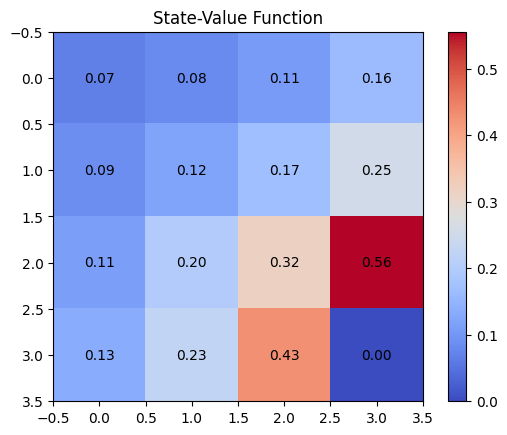

In [13]:
if __name__ == "__main__":
    env = GridWorld()
    state_values = td_learning(env, episodes=1000, alpha=0.1, gamma=0.9)
    plot_values(state_values)

* The plot illustrates the learned state-value function
* The agent has learned an optimal policy by assigning higher values to states that lead to the goal and lower values to states that don't.
* Higher values (warmer colors) indicate states that are expected to yield higher cumulative rewards. These states are generally closer to the goal state or on paths that lead to the goal.

* Lower values (cooler colors) indicate states that are expected to yield lower cumulative rewards. These states are typically further away from the goal state or on paths that are less likely to lead to the goal.